In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def find_centre(path):
    
    # code base on yf's task1.py

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    kernel = 11
    img = cv2.GaussianBlur(img, (kernel, kernel), 0)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    th = np.where(hist == np.max(hist))
    ret, thresh = cv2.threshold(img, th[0] + 1, 255, cv2.THRESH_BINARY)
    thresh = cv2.erode(thresh, np.ones((9, 9)))
    thresh = cv2.dilate(thresh, np.ones((9, 9)))

    thresh, contours, hirearchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    original = cv2.imread(path,1)

    draw = cv2.drawContours(original, contours, -1, (0, 255, 0), 2)

    centX = []
    centY = []
    for i,j in zip(contours,range(len(contours))):
        M = cv2.moments(i)
        cX = int(M["m10"]/M["m00"])
        cY = int(M["m01"]/M["m00"])
        centX.append(cX)
        centY.append(cY)
        
    return centX,centY


In [16]:
ax,ay = find_centre('t000.tif')
bx,by = find_centre('t001.tif')

In [17]:
for i in range(len(ax)):
    print([ax[i],ay[i]])

[391, 675]
[382, 640]
[194, 598]
[165, 569]
[932, 554]
[970, 554]
[115, 524]
[51, 514]
[19, 503]
[120, 468]
[351, 462]
[76, 462]
[488, 449]
[524, 437]
[1032, 402]
[278, 300]
[245, 278]
[834, 219]
[959, 217]
[808, 199]
[953, 182]
[463, 181]
[408, 169]
[510, 159]
[682, 21]


In [18]:
for i in range(len(ax)):
    print([bx[i],by[i]])

[391, 676]
[382, 641]
[193, 600]
[166, 570]
[968, 556]
[936, 552]
[116, 526]
[55, 512]
[21, 500]
[353, 463]
[117, 467]
[77, 461]
[490, 451]
[361, 436]
[525, 438]
[1032, 403]
[278, 299]
[243, 277]
[959, 219]
[835, 218]
[808, 199]
[953, 183]
[465, 181]
[402, 172]
[511, 158]


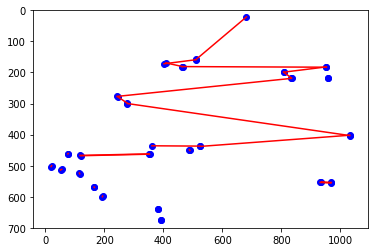

In [19]:
plt.ylim(700,0)
for i in range(len(ax)):
    plt.plot([ax[i],bx[i]],[ay[i],by[i]],color='r')
    plt.scatter([ax[i],bx[i]],[ay[i],by[i]],color='b')

In [ ]:
#red lines matches wrong but blue is correct

#maybe sort them first accroding to their position
#find the nearest one because the movement is slight

#but don't know how to deal with motosis